# Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in cleaned data for training and spray

In [3]:
spray_df = pd.read_csv("../../data/spray_clean.csv", parse_dates=['date'])
train_df = pd.read_csv("../../data/train_clean.csv", parse_dates=['date'])

## Spray data

In [7]:
spray_df.head()

,date,latitude,longitude
0,2011-08-29,42.391623,-88.089163
1,2011-08-29,42.391348,-88.089163
2,2011-08-29,42.391022,-88.089157
3,2011-08-29,42.390637,-88.089158
4,2011-08-29,42.390410,-88.088858


In [8]:
spray_df.dtypes

date         datetime64[ns]
latitude            float64
longitude           float64
dtype: object

In [18]:
spray_df["year"] = spray_df["date"].dt.year
spray_df["year"].value_counts()

2013    12626
2011     1668
Name: year, dtype: int64

In [20]:
# Split the dataframe based on year
spray_df_2013 = spray_df[spray_df["year"] == 2013]
spray_df_2011 = spray_df[spray_df["year"] == 2011]

Plot the spray areas for different years to identify if there are common areas 

Text(0.5, 1.0, 'Location of sprays in 2013')

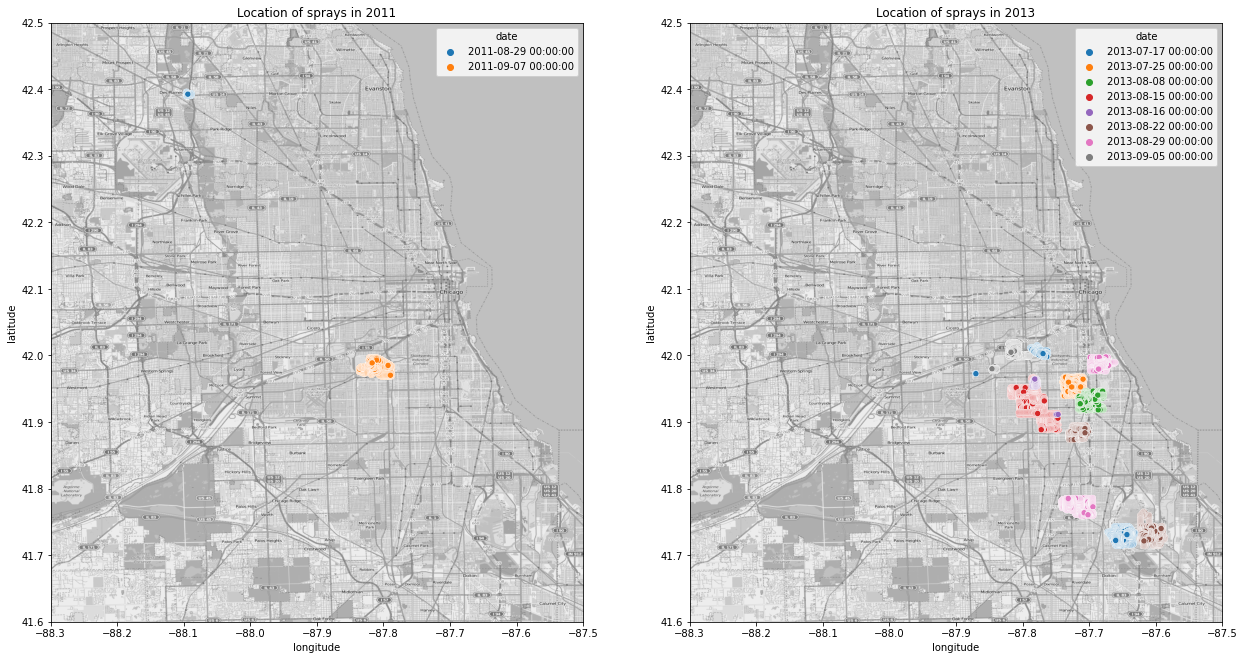

In [31]:
mapdata = np.loadtxt("../../data/mapdata_copyright_openstreetmap_contributors.txt")

origin = [41.6, -88.3]              # lat/long of origin (lower left corner)
upperRight = [42.5, -87.5]          # lat/long of upper right corner
#rescales the image data to the GPS co-ordinates of the bounding box for Chicago defined by extent arguments

fig, ax = plt.subplots(1, 2, figsize = (21,15))
ax[0].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
ax[1].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
sns.scatterplot(x = "longitude", y = "latitude", data= spray_df_2011, hue = 'date', ax = ax[0]);
sns.scatterplot(x = "longitude", y = "latitude", data= spray_df_2013, hue = 'date', ax = ax[1]);

ax[0].set_title("Location of sprays in 2011")
ax[1].set_title("Location of sprays in 2013")

#plt.savefig('map.png')

## Train data

In [6]:
train_df.head()

,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy,nummosquitos,wnvpresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [9]:
train_df.dtypes

date                      datetime64[ns]
address                           object
species                           object
block                              int64
street                            object
trap                              object
addressnumberandstreet            object
latitude                         float64
longitude                        float64
addressaccuracy                    int64
nummosquitos                       int64
wnvpresent                         int64
dtype: object

Drop columns such as `address`, `block`, `street`, `trap` and `addressnumberandstreet` since we have lat lon columns

In [34]:
train_df.drop(["address", "block", "street", "addressnumberandstreet", "addressaccuracy"],
              axis = 1,
              inplace = True)

In [35]:
train_df.head()

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0


Check West Nile Virus class representations 

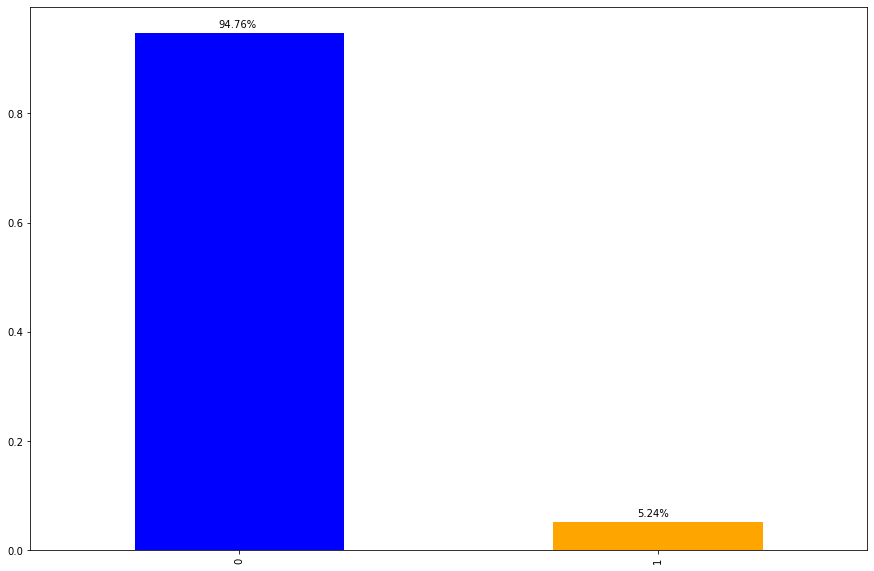

In [47]:
fig, ax  = plt.subplots(figsize = (15,10))
train_df["wnvpresent"].value_counts(normalize = True).plot(kind = "bar", ax = ax, color = ["blue", "orange"])
for i in ax.patches:
    height = i.get_height()
    ax.text(i.get_x()+ 0.4*i.get_width(), height+0.01,'{:.2f}{}'.format(height*100,'%'))

In [46]:
#Set year column to get the year value from date
train_df["year"] = train_df["date"].dt.year
train_df["year"].value_counts()

2007    3811
2013    2392
2009    2249
2011    2054
Name: year, dtype: int64

In [83]:
#Check number of traps
train_df["trap"].value_counts()

T900     750
T115     542
T138     314
T002     185
T135     183
        ... 
T238       7
T094B      5
T076       5
T237       3
T040       2
Name: trap, Length: 136, dtype: int64

In [49]:
# Hypothesis if more mosquitoes caught means higher chances of having the presence of virus.
# Since max number of mosquitos per entry is 50, special processing is needed to 
# sum up the mosquitoes count for the sample place. Need to group by date and lat long

total_mosquitoes_df = train_df.groupby(["date","trap","species"])[["nummosquitos"]].sum()

#Rename column
total_mosquitoes_df.columns = ["totalmosquitos"]
total_mosquitoes_df

totalmosquitos
date       trap species                               
2007-05-29 T002 CULEX PIPIENS/RESTUANS               1
                CULEX RESTUANS                       1
           T007 CULEX RESTUANS                       1
           T015 CULEX PIPIENS/RESTUANS               1
                CULEX RESTUANS                       4
...                                                ...
2013-09-26 T232 CULEX PIPIENS/RESTUANS               1
           T233 CULEX PIPIENS/RESTUANS               5
           T235 CULEX PIPIENS/RESTUANS               1
           T900 CULEX PIPIENS                       37
                CULEX PIPIENS/RESTUANS              43

[8475 rows x 1 columns]

Plot number of mosquitoes based on species across the years to identify which species are the most common, which could aid in determining if it contributes to West Nile Virus 

Text(0, 0.5, 'Mosquito Counts')

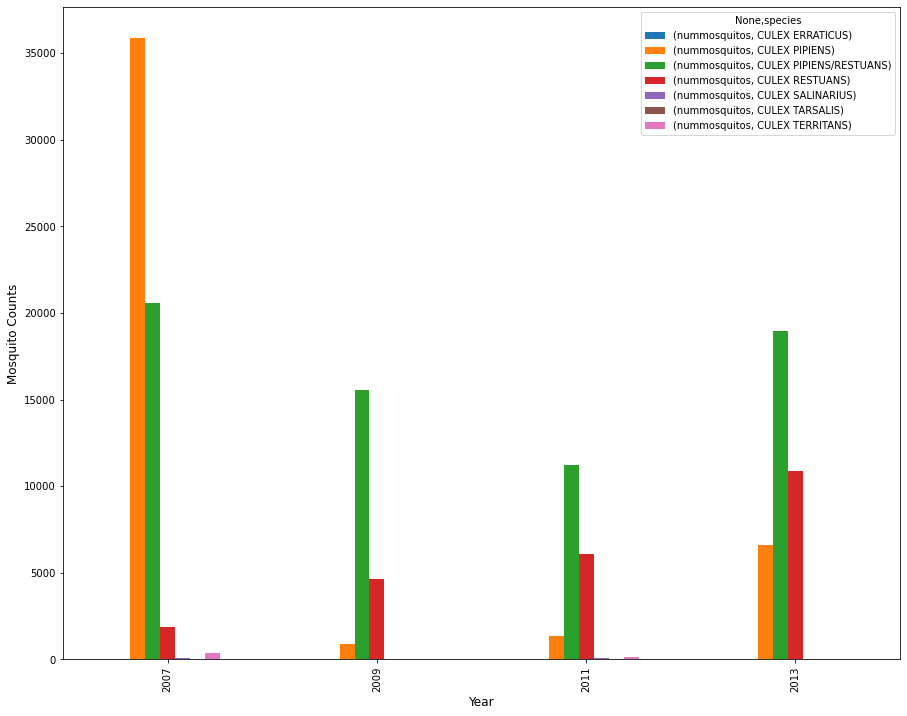

In [104]:
fig, ax = plt.subplots(figsize = (15,12))
mosquito_count_year_plots = train_df.groupby(["year","species"])[["nummosquitos"]].sum().unstack().plot.bar(ax = ax)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Mosquito Counts", fontsize = 12)

In [81]:
#Split dataframe into smaller dataframes by year
train_df_2007 = train_df[train_df["year"] == 2007]
train_df_2009 = train_df[train_df["year"] == 2009]
train_df_2011 = train_df[train_df["year"] == 2011]
train_df_2013 = train_df[train_df["year"] == 2013]

In [118]:
train_df_2007

,date,species,trap,latitude,longitude,nummosquitos,wnvpresent,year
0,2007-05-29,CULEX PIPIENS/RESTUANS,T002,41.954690,-87.800991,1,0,2007
1,2007-05-29,CULEX RESTUANS,T002,41.954690,-87.800991,1,0,2007
2,2007-05-29,CULEX RESTUANS,T007,41.994991,-87.769279,1,0,2007
3,2007-05-29,CULEX PIPIENS/RESTUANS,T015,41.974089,-87.824812,1,0,2007
4,2007-05-29,CULEX RESTUANS,T015,41.974089,-87.824812,4,0,2007
...,...,...,...,...,...,...,...,...
3806,2007-10-09,CULEX PIPIENS/RESTUANS,T128,41.704572,-87.565666,1,0,2007
3807,2007-10-09,CULEX PIPIENS,T128,41.704572,-87.565666,3,0,2007
3808,2007-10-09,CULEX PIPIENS/RESTUANS,T027,41.984809,-87.728492,1,0,2007
3809,2007-10-09,CULEX PIPIENS/RESTUANS,T221,41.659112,-87.538693,1,0,2007


Plot number of mosquitoes captured in traps across different years

<AxesSubplot:>

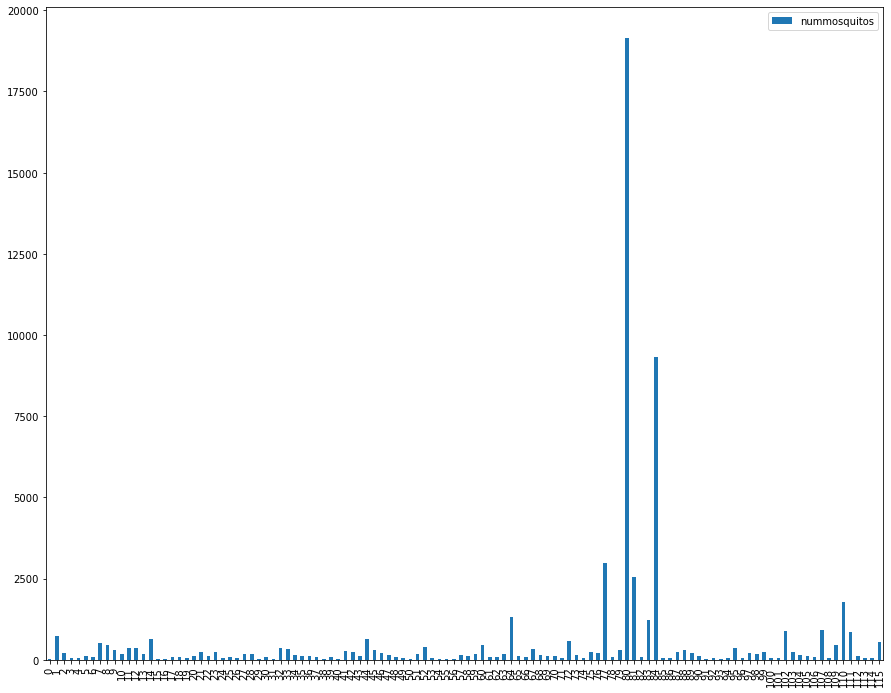

In [130]:
fig, ax = plt.subplots(figsize = (15,12))
mosquito_count_year_plots = train_df_2007.groupby("trap")[["nummosquitos"]].sum()
mosquito_count_year_plots.reset_index(inplace = True)
mosquito_count_year_plots.head()
mosquito_count_year_plots.plot.bar(ax = ax);
#ax.set_xlabel("Year", fontsize = 12)
#ax.set_ylabel("Mosquito Count", fontsize = 12)

Check the location of traps and mark out location 

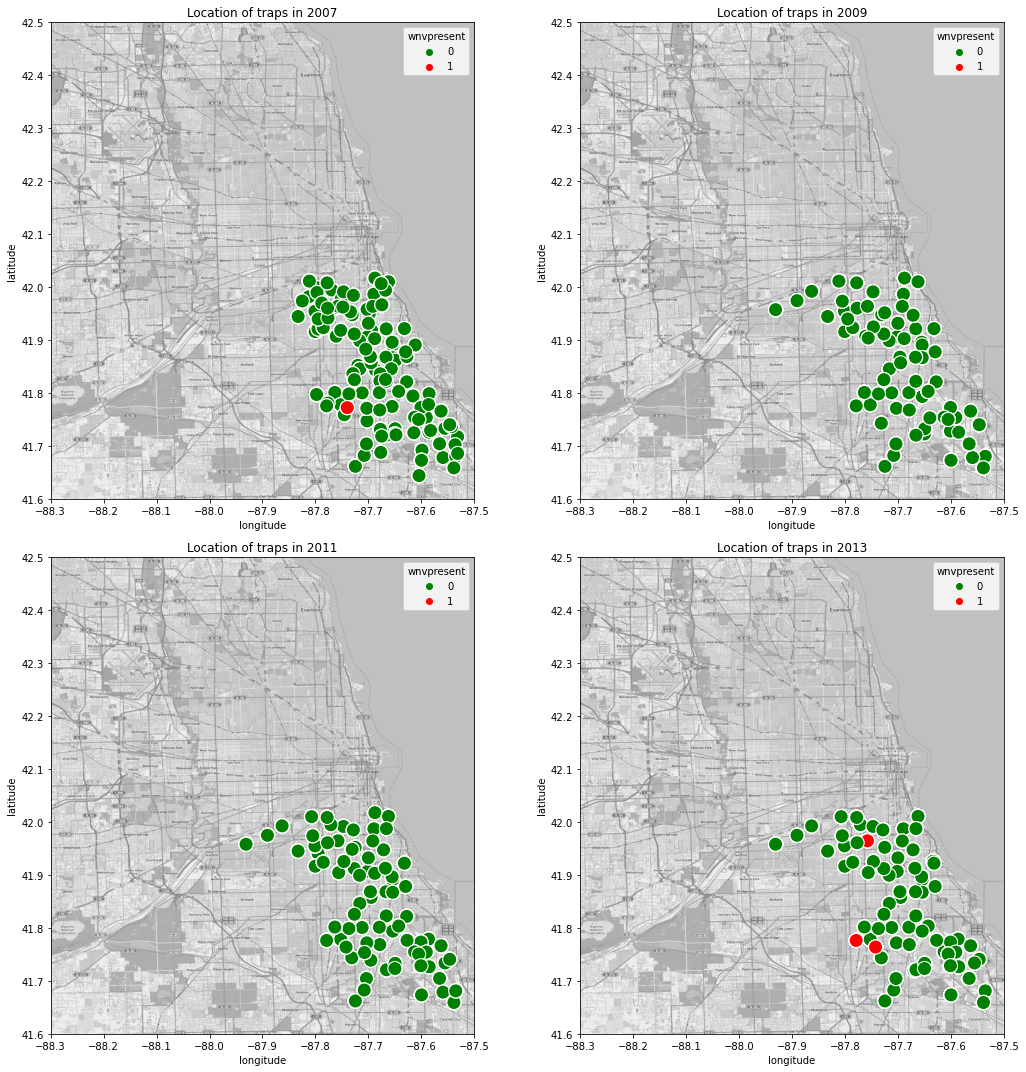

In [114]:
mapdata = np.loadtxt("../../data/mapdata_copyright_openstreetmap_contributors.txt")

origin = [41.6, -88.3]              # lat/long of origin (lower left corner)
upperRight = [42.5, -87.5]          # lat/long of upper right corner
#rescales the image data to the GPS co-ordinates of the bounding box for Chicago defined by extent arguments

fig, ax = plt.subplots(2, 2, figsize = (15,15))
ax[0,0].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
ax[0,1].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
ax[1,0].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])
ax[1,1].imshow(mapdata, cmap=plt.get_cmap('gray'), extent=[origin[1], upperRight[1], origin[0], upperRight[0]])

sns.scatterplot(x = "longitude", y = "latitude", data= train_df_2007, hue = "wnvpresent", ax = ax[0,0], palette=['green','red'], s = 200,)
sns.scatterplot(x = "longitude", y = "latitude", data= train_df_2009, hue = "wnvpresent", ax = ax[0,1], palette=['green','red'], s = 200,)
sns.scatterplot(x = "longitude", y = "latitude", data= train_df_2011, hue = "wnvpresent", ax = ax[1,0], palette=['green','red'], s = 200,)
sns.scatterplot(x = "longitude", y = "latitude", data= train_df_2013, hue = "wnvpresent", ax = ax[1,1], palette=['green','red'], s = 200,)

ax[0,0].set_title("Location of traps in 2007 with status on presence of West Nile Virus")
ax[0,1].set_title("Location of traps in 2009 with status on presence of West Nile Virus")
ax[1,0].set_title("Location of traps in 2011 with status on presence of West Nile Virus")
ax[1,1].set_title("Location of traps in 2013 with status on presence of West Nile Virus")
plt.tight_layout()

Split dataframe into smaller dataframes by year

Check the number of mosquitoes for each type across the years

In [ ]:
train_df_2007.groupby(["species"])[["nummosquitos"]].sum()

<AxesSubplot:xlabel='date,trap,species'>

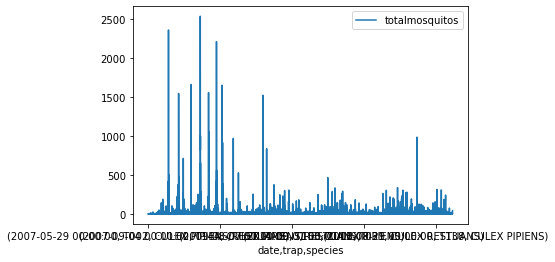

In [44]:
# Hypothesis if more mosquitoes caught means higher chances of having the presence of virus.
# Since max number of mosquitos per entry is 50, special processing is needed to 
# sum up the mosquitoes count for the sample place. Need to group by date and lat long

total_mosquitoes_df = train_df.groupby(["date","trap","species"])[["nummosquitos"]].sum()

#Rename column
total_mosquitoes_df.columns = ["totalmosquitos"]

total_mosquitoes_df.plot()

## Read map data